**Lineup Data Preparation**

In [1]:
import pandas as pd
labeled_df = pd.read_csv('labeled_data.csv')
lineup = pd.read_csv('lineup_data.csv')
lineup.head()

,GROUP_ID,SEASON,NET_RATING
0,-978-2050-2199-2561-101108-,2007-08,11.1
1,-686-739-1497-1888-2419-,2007-08,11.9
2,-708-951-1718-2570-200765-,2007-08,19.4
3,-1905-2246-2430-101114-200758-,2007-08,4.6
4,-947-948-1853-2030-2546-,2007-08,2.2


In [2]:
target = lineup['NET_RATING']

In [3]:
feature_cols = ['POS0_COUNT','POS1_COUNT','POS2_COUNT','POS3_COUNT','POS4_COUNT','POS5_COUNT','POS6_COUNT',
               'POS7_COUNT','POS8_COUNT','POS9_COUNT']
# generate a list of all features to be used in regression
for col in labeled_df.columns[3:-1]:
    for i in range(10):
        feature_cols.append(col+'_POS'+str(i))
feature_cols

['POS0_COUNT',
 'POS1_COUNT',
 'POS2_COUNT',
 'POS3_COUNT',
 'POS4_COUNT',
 'POS5_COUNT',
 'POS6_COUNT',
 'POS7_COUNT',
 'POS8_COUNT',
 'POS9_COUNT',
 'FG3A_POS0',
 'FG3A_POS1',
 'FG3A_POS2',
 'FG3A_POS3',
 'FG3A_POS4',
 'FG3A_POS5',
 'FG3A_POS6',
 'FG3A_POS7',
 'FG3A_POS8',
 'FG3A_POS9',
 'FG3_PCT_POS0',
 'FG3_PCT_POS1',
 'FG3_PCT_POS2',
 'FG3_PCT_POS3',
 'FG3_PCT_POS4',
 'FG3_PCT_POS5',
 'FG3_PCT_POS6',
 'FG3_PCT_POS7',
 'FG3_PCT_POS8',
 'FG3_PCT_POS9',
 'FGA_POS0',
 'FGA_POS1',
 'FGA_POS2',
 'FGA_POS3',
 'FGA_POS4',
 'FGA_POS5',
 'FGA_POS6',
 'FGA_POS7',
 'FGA_POS8',
 'FGA_POS9',
 'FG_PCT_POS0',
 'FG_PCT_POS1',
 'FG_PCT_POS2',
 'FG_PCT_POS3',
 'FG_PCT_POS4',
 'FG_PCT_POS5',
 'FG_PCT_POS6',
 'FG_PCT_POS7',
 'FG_PCT_POS8',
 'FG_PCT_POS9',
 'FTA_POS0',
 'FTA_POS1',
 'FTA_POS2',
 'FTA_POS3',
 'FTA_POS4',
 'FTA_POS5',
 'FTA_POS6',
 'FTA_POS7',
 'FTA_POS8',
 'FTA_POS9',
 'FT_PCT_POS0',
 'FT_PCT_POS1',
 'FT_PCT_POS2',
 'FT_PCT_POS3',
 'FT_PCT_POS4',
 'FT_PCT_POS5',
 'FT_PCT_POS6',
 'FT_PCT

In [4]:
features = pd.DataFrame(columns = feature_cols, index = lineup['GROUP_ID'])
features.fillna(0, inplace=True)
lineup2 = features.merge(lineup,on='GROUP_ID')
features2 = lineup2.drop(['NET_RATING'],axis=1)
features2.head()

,GROUP_ID,POS0_COUNT,POS1_COUNT,POS2_COUNT,POS3_COUNT,POS4_COUNT,POS5_COUNT,POS6_COUNT,POS7_COUNT,POS8_COUNT,...,PCT_UAST_FGM_POS1,PCT_UAST_FGM_POS2,PCT_UAST_FGM_POS3,PCT_UAST_FGM_POS4,PCT_UAST_FGM_POS5,PCT_UAST_FGM_POS6,PCT_UAST_FGM_POS7,PCT_UAST_FGM_POS8,PCT_UAST_FGM_POS9,SEASON
0,-978-2050-2199-2561-101108-,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,2007-08
1,-978-2050-2199-2561-101108-,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,2008-09
2,-978-2050-2199-2561-101108-,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,2007-08
3,-978-2050-2199-2561-101108-,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,2008-09
4,-686-739-1497-1888-2419-,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,2007-08


In [7]:
# WARNING: this cell takes about an hour to run
# get the sum of each statistic for each position assigned by the clustering algorithm for each lineup, 
# as well as the count of each position in the lineup
for j in range(len(labeled_df)):
    for i in range(len(features)):
        if str(labeled_df.iloc[j,0]) in features2.iloc[i,0].split('-') and labeled_df.iloc[j,2] == features2.iloc[i,-1]:
            features.iloc[i,labeled_df.iloc[j,-1]] += 1
            for feat in range(1,25):
                features.iloc[i,(10*feat)+labeled_df.iloc[j,-1]] += labeled_df.iloc[j,feat+2]
    if j == len(labeled_df):
        print('FINISHED')

In [8]:
features.head()

,POS0_COUNT,POS1_COUNT,POS2_COUNT,POS3_COUNT,POS4_COUNT,POS5_COUNT,POS6_COUNT,POS7_COUNT,POS8_COUNT,POS9_COUNT,...,PCT_UAST_FGM_POS0,PCT_UAST_FGM_POS1,PCT_UAST_FGM_POS2,PCT_UAST_FGM_POS3,PCT_UAST_FGM_POS4,PCT_UAST_FGM_POS5,PCT_UAST_FGM_POS6,PCT_UAST_FGM_POS7,PCT_UAST_FGM_POS8,PCT_UAST_FGM_POS9
GROUP_ID,,,,,,,,,,,,,,,,,,,,,
-978-2050-2199-2561-101108-,0.0,1.0,0.0,0.0,1.0,2.0,1.0,0.0,0.0,0.0,...,0.0,0.182614,0.000000,0.0,-0.056991,-3.136698,2.541807,0.0,0.0,0.000000
-686-739-1497-1888-2419-,0.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,...,0.0,0.066391,0.000000,0.0,-0.781584,-1.289131,2.783626,0.0,0.0,0.000000
-708-951-1718-2570-200765-,0.0,1.0,0.0,0.0,1.0,2.0,1.0,0.0,0.0,0.0,...,0.0,0.182614,0.000000,0.0,-0.056991,-3.136698,2.541807,0.0,0.0,0.000000
-1905-2246-2430-101114-200758-,0.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,...,0.0,0.066391,0.000000,0.0,-0.781584,-1.289131,2.783626,0.0,0.0,0.000000
-947-948-1853-2030-2546-,0.0,0.0,2.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,...,0.0,0.000000,-0.458032,0.0,0.000000,-0.573065,1.657109,0.0,0.0,-1.592924


In [9]:
features.to_csv('regression_features.csv', index=False)

In [10]:
target.to_csv('regression_target.csv', index=False)

**Data Exploration**

In [5]:
features = pd.read_csv('regression_features.csv')
target = pd.read_csv('regression_target.csv')

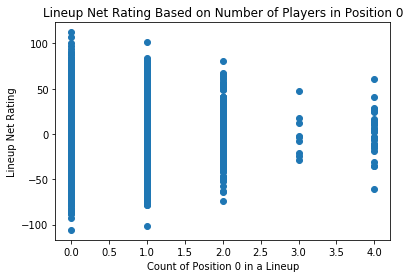

In [4]:
import matplotlib.pyplot as plt

plt.scatter(features['POS0_COUNT'], target)
plt.xlabel('Count of Position 0 in a Lineup')
plt.ylabel('Lineup Net Rating')
plt.title('Lineup Net Rating Based on Number of Players in Position 0')
plt.savefig('pos0_viz.png')

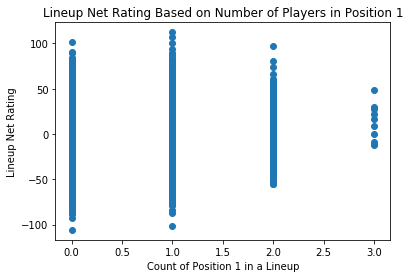

In [5]:
plt.scatter(features['POS1_COUNT'], target)
plt.xlabel('Count of Position 1 in a Lineup')
plt.ylabel('Lineup Net Rating')
plt.title('Lineup Net Rating Based on Number of Players in Position 1')
plt.savefig('pos1_viz.png')

**Regression**

We will be testing four different regression algorithms for our lineup net rating prediction task: linear regression, random forest, gradient boosting, and MLP regressor. Before we do this, however, we will use Recursive Feature Elimination to reduce our number of features to be used in the algorithms to 25.

In [11]:
target.head()

0    11.1
1    11.9
2    19.4
3     4.6
4     2.2
Name: NET_RATING, dtype: float64

In [25]:
corr = [[feat,features[feat].corr(target.iloc[:,0])] for feat in features.columns]
corr

[['POS0_COUNT', 0.0017003277921677998],
 ['POS1_COUNT', 0.004496192869680689],
 ['POS2_COUNT', 0.009278048979959737],
 ['POS3_COUNT', 0.009747585835088871],
 ['POS4_COUNT', 0.006876887563069244],
 ['POS5_COUNT', -0.008137829497953416],
 ['POS6_COUNT', -0.00444159280541612],
 ['POS7_COUNT', -0.01139186137791372],
 ['POS8_COUNT', 0.0018523127625347535],
 ['POS9_COUNT', -0.004669423159963718],
 ['FG3A_POS0', 0.005032596392296991],
 ['FG3A_POS1', -0.007983379288322972],
 ['FG3A_POS2', 0.0076952975479904285],
 ['FG3A_POS3', 0.004997090474746851],
 ['FG3A_POS4', -0.008168977855265758],
 ['FG3A_POS5', -0.0017186055525204636],
 ['FG3A_POS6', -0.012961965228362198],
 ['FG3A_POS7', -0.001417965238999279],
 ['FG3A_POS8', -0.0012299622036543302],
 ['FG3A_POS9', 0.0046040071841167984],
 ['FG3_PCT_POS0', 0.0056183699400538896],
 ['FG3_PCT_POS1', 0.003789749871869661],
 ['FG3_PCT_POS2', 0.008886701623009075],
 ['FG3_PCT_POS3', 0.01078434898686858],
 ['FG3_PCT_POS4', -0.006916386307479049],
 ['FG3_PCT

In [12]:
from sklearn.feature_selection import RFE
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(features, target, random_state=3000)

select = RFE(DecisionTreeRegressor(random_state=3000), n_features_to_select=25)
select.fit(X_train, y_train)

X_train_selected = select.transform(X_train)
X_test_selected = select.transform(X_test)

selected_features = [feature for feature, status in zip(features, select.get_support()) if status == True]
print('Selected features:')
for feature in selected_features:
    print('\t' + feature)

Selected features:
	FG_PCT_POS5
	FT_PCT_POS7
	FT_PCT_POS8
	TOV_POS2
	TOV_POS4
	STL_POS7
	STL_POS9
	PTS_POS9
	PF_POS0
	OFF_RATING_POS0
	OFF_RATING_POS4
	DEF_RATING_POS1
	DEF_RATING_POS4
	AST_RATIO_POS1
	AST_RATIO_POS3
	AST_RATIO_POS6
	OREB_PCT_POS2
	DREB_PCT_POS5
	DREB_PCT_POS6
	EFG_PCT_POS6
	EFG_PCT_POS7
	USG_PCT_POS2
	PCT_PTS_2PT_MR_POS5
	PCT_PTS_2PT_MR_POS7
	PCT_PTS_2PT_MR_POS8


In [13]:
from sklearn.ensemble import GradientBoostingRegressor, RandomForestRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.linear_model import LinearRegression

Linear Regression

In [15]:
from sklearn.metrics import r2_score, mean_squared_error

# fit the model for linear regression first for all features
linear = LinearRegression()
linear_model = linear.fit(X=X_train, y=y_train)
RMSE_train = mean_squared_error(y_train, linear_model.predict(X_train), squared=False)
RMSE_test = mean_squared_error(y_test, linear_model.predict(X_test), squared=False)
    
# model predicts training/testing and RMSE is calculated
print('Linear Regression with All Features:')
print('\tR-squared value for training set: ', r2_score(y_train, linear_model.predict(X_train)))
print('\tR-squared value for testing set: ', r2_score(y_test, linear_model.predict(X_test)))
print("\tRMSE value for training set: ", round(RMSE_train,4))
print("\tRMSE value for testing set: ", round(RMSE_test,4))

Linear Regression with All Features:
	R-squared value for training set:  0.017353275200598817
	R-squared value for testing set:  -0.019217829932266284
	RMSE value for training set:  22.287
	RMSE value for testing set:  22.9069


In [16]:
# fit the model for linear regression using the selected features only
linear_model2 = linear.fit(X_train_selected, y_train)
RMSE_train = mean_squared_error(y_train, linear_model2.predict(X_train_selected), squared=False)
RMSE_test = mean_squared_error(y_test, linear_model2.predict(X_test_selected), squared=False)

# model predicts training/testing and RMSE is calculated
print('Linear Regression with Selected Features:')
print('\tR-squared value for training set: ', r2_score(y_train, linear_model2.predict(X_train_selected)))
print('\tR-squared value for testing set: ', r2_score(y_test, linear_model2.predict(X_test_selected)))
print("\tRMSE value for training set: ", round(RMSE_train,4))
print("\tRMSE value for testing set: ", round(RMSE_test,4))

Linear Regression with Selected Features:
	R-squared value for training set:  0.0016861184480898572
	R-squared value for testing set:  -0.0020640389185715424
	RMSE value for training set:  22.464
	RMSE value for testing set:  22.7134


Random Forest

In [17]:
# fit the model for random forest regression with different values for number of estimators
n_estimators = [10,50,100]
print('Random Forest with All Features:')
for n in n_estimators:
    forest = RandomForestRegressor(n_estimators=n, max_depth=50)
    forest_model = forest.fit(X=X_train, y=y_train)
    print('\nFor n =',n,':\n\tR-squared value for training set:',r2_score(y_train,forest_model.predict(X_train)))
    print('\tR-squared value for testing set:',r2_score(y_test,forest_model.predict(X_test)))
    print('\tRMSE value for training set:',mean_squared_error(y_train,forest_model.predict(X_train),squared=False))
    print('\tRMSE value for training set:',mean_squared_error(y_test,forest_model.predict(X_test),squared=False))

Random Forest with All Features:

For n = 10 :
	R-squared value for training set: 0.6443300834880841
	R-squared value for testing set: -0.23995439502646976
	RMSE value for training set: 13.408403116327984
	RMSE value for training set: 25.265997648295706

For n = 50 :
	R-squared value for training set: 0.702634283596357
	R-squared value for testing set: -0.18127250314188403
	RMSE value for training set: 12.260239109131595
	RMSE value for training set: 24.66088413078888

For n = 100 :
	R-squared value for training set: 0.7124640224134817
	R-squared value for testing set: -0.1661667808245484
	RMSE value for training set: 12.05589864899512
	RMSE value for training set: 24.50269918198436


In [18]:
# selected features
n_estimators = [10,50,100]
print('Random Forest with Selected Features:')
for n in n_estimators:
    forest = RandomForestRegressor(n_estimators=n, max_depth=50)
    forest_model2 = forest.fit(X=X_train_selected, y=y_train)
    print('\nFor n =',n,':\n\tR-squared value for training set:',r2_score(y_train,forest_model2.predict(X_train_selected)))
    print('\tR-squared value for testing set:',r2_score(y_test,forest_model2.predict(X_test_selected)))
    print('\tRMSE value for training set:',mean_squared_error(y_train,forest_model2.predict(X_train_selected),squared=False))
    print('\tRMSE value for training set:',mean_squared_error(y_test,forest_model2.predict(X_test_selected),squared=False))

Random Forest with Selected Features:

For n = 10 :
	R-squared value for training set: 0.6863255712817861
	R-squared value for testing set: -0.2585689656118846
	RMSE value for training set: 12.59195171485151
	RMSE value for training set: 25.45494157012024

For n = 50 :
	R-squared value for training set: 0.7255842899066549
	R-squared value for testing set: -0.18642292500797586
	RMSE value for training set: 11.777631914168172
	RMSE value for training set: 24.714587154574946

For n = 100 :
	R-squared value for training set: 0.7323378648195427
	R-squared value for testing set: -0.18414859102088532
	RMSE value for training set: 11.631800927771389
	RMSE value for training set: 24.690887263069197


Gradient Boosting

In [20]:
# fit the model for gradient boosting regression with the same values for number of estimators as random forest
print('Gradient Boosting with All Features:')
for n in n_estimators:
    boosting = GradientBoostingRegressor(n_estimators=n)
    boosting_model = boosting.fit(X=X_train, y=y_train)
    print('\nFor n =',n,':\n\tR-squared value for training set:',r2_score(y_train,boosting_model.predict(X_train)))
    print('\tR-squared value for testing set:',r2_score(y_test,boosting_model.predict(X_test)))
    print('\tRMSE value for training set:',mean_squared_error(y_train,boosting_model.predict(X_train),squared=False))
    print('\tRMSE value for training set:',mean_squared_error(y_test,boosting_model.predict(X_test),squared=False))

Gradient Boosting with All Features:

For n = 10 :
	R-squared value for training set: 0.007982091414599046
	R-squared value for testing set: -0.0022860094327941116
	RMSE value for training set: 22.393049907922425
	RMSE value for training set: 22.71587286324292

For n = 50 :
	R-squared value for training set: 0.033942678344309196
	R-squared value for testing set: -0.0069806785679260575
	RMSE value for training set: 22.098100276803947
	RMSE value for training set: 22.76901084945341

For n = 100 :
	R-squared value for training set: 0.05791252131039326
	R-squared value for testing set: -0.01055192684739259
	RMSE value for training set: 21.822228935980963
	RMSE value for training set: 22.809350165512317


In [21]:
# selected features
print('Gradient Boosting with Selected Features:')
for n in n_estimators:
    boosting = GradientBoostingRegressor(n_estimators=n)
    boosting_model2 = boosting.fit(X=X_train_selected, y=y_train)
    print('\nFor n =',n,':\n\tR-squared value for training set:',r2_score(y_train,boosting_model2.predict(X_train_selected)))
    print('\tR-squared value for testing set:',r2_score(y_test,boosting_model2.predict(X_test_selected)))
    print('\tRMSE value for training set:',mean_squared_error(y_train,boosting_model2.predict(X_train_selected),squared=False))
    print('\tRMSE value for training set:',mean_squared_error(y_test,boosting_model2.predict(X_test_selected),squared=False))

Gradient Boosting with Selected Features:

For n = 10 :
	R-squared value for training set: 0.005772816644257439
	R-squared value for testing set: -0.0006703448192613148
	RMSE value for training set: 22.41797127577282
	RMSE value for training set: 22.697556716979545

For n = 50 :
	R-squared value for training set: 0.02211274538378394
	R-squared value for testing set: -0.00246784028293745
	RMSE value for training set: 22.23299061659428
	RMSE value for training set: 22.71793328268417

For n = 100 :
	R-squared value for training set: 0.03977755107852987
	R-squared value for testing set: -0.006660870639719985
	RMSE value for training set: 22.031264238663002
	RMSE value for training set: 22.765394946693227


MLP Regressor

In [24]:
# fit the model for Multi-Layer Perceptron regressor using all features and varying the hidden layers sizes
n_layer_size = [10,50,100]
print('MLP with All Features:')
for n in n_layer_size:
    mlp = MLPRegressor(hidden_layer_sizes=n,max_iter=1000)
    mlp_model = mlp.fit(X=X_train, y=y_train)
    print('\nFor n =',n,':\n\tR-squared value for training set:',r2_score(y_train,mlp_model.predict(X_train)))
    print('\tR-squared value for testing set:',r2_score(y_test,mlp_model.predict(X_test)))
    print('\tRMSE value for training set:',mean_squared_error(y_train,mlp_model.predict(X_train),squared=False))
    print('\tRMSE value for training set:',mean_squared_error(y_test,mlp_model.predict(X_test),squared=False))

MLP with All Features:

For n = 10 :
	R-squared value for training set: 0.1544581155446867
	R-squared value for testing set: -0.1549195183666039
	RMSE value for training set: 20.673835417792255
	RMSE value for training set: 24.38425300230155

For n = 50 :
	R-squared value for training set: 0.5894886835070592
	R-squared value for testing set: -0.7092518884130625
	RMSE value for training set: 14.405092742492437
	RMSE value for training set: 29.664472459143717

For n = 100 :
	R-squared value for training set: 0.7907280842598309
	R-squared value for testing set: -0.9888626054364658
	RMSE value for training set: 10.285110614545765
	RMSE value for training set: 31.998969050270286


In [25]:
# fit the model for Multi-Layer Perceptron regressor using selected features and varying the hidden layers sizes
n_layer_size = [10,50,100]
print('MLP with Selected Features:')
for n in n_layer_size:
    mlp = MLPRegressor(hidden_layer_sizes=n,max_iter=1000)
    mlp_model2 = mlp.fit(X=X_train_selected, y=y_train)
    print('\nFor n =',n,':\n\tR-squared value for training set:',r2_score(y_train,mlp_model2.predict(X_train_selected)))
    print('\tR-squared value for testing set:',r2_score(y_test,mlp_model2.predict(X_test_selected)))
    print('\tRMSE value for training set:',mean_squared_error(y_train,mlp_model2.predict(X_train_selected),squared=False))
    print('\tRMSE value for training set:',mean_squared_error(y_test,mlp_model2.predict(X_test_selected),squared=False))

MLP with Selected Features:

For n = 10 :
	R-squared value for training set: 0.0236580666132733
	R-squared value for testing set: -0.02134632536920389
	RMSE value for training set: 22.215416659931332
	RMSE value for training set: 22.930847737487596


/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)



For n = 50 :
	R-squared value for training set: 0.11409999242938418
	R-squared value for testing set: -0.09265169140633689
	RMSE value for training set: 21.161470558419868
	RMSE value for training set: 23.71780348718679

For n = 100 :
	R-squared value for training set: 0.20038100513516133
	R-squared value for testing set: -0.14303948827250101
	RMSE value for training set: 20.104581764768707
	RMSE value for training set: 24.258515030538625


/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
